# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from sklearn.datasets import fetch_mldata
import os
# Fetch the data
try:
    mnist = fetch_mldata('MNIST original', data_home='.')
except Exception:
    raise FileNotFoundError('Please download mnist-original.mat from Canvas and put it in %s/mldata' % os.getcwd())
data, target = mnist.data, mnist.target.astype('int')
# Shuffle
indices = np.arange(len(data))
np.random.seed(123)
np.random.shuffle(indices)
data, target = data[indices].astype('float32'), target[indices]

# Normalize the data between 0.0 and 1.0:
data /= 255. 

# Split
x_train, x_valid, x_test = data[:50000], data[50000:60000], data[60000: 70000]
t_train, t_valid, t_test = target[:50000], target[50000:60000], target[60000: 70000]

# Inits

In [3]:
X=x_valid
N=X.shape[0]
avg=np.sum(X,axis=0)/N
X_normalized=X-avg
X_normalized.shape # Data

(10000, 784)

# PCA

In [4]:
S=(X_normalized.T@X_normalized)/(N) # Covariance Matrix
S.shape

(784, 784)

In [5]:
Lamb,U=scipy.linalg.eig(S) # Eigenvalues Lamb and eigenvectors U
U=U.real
U.shape

(784, 784)

In [6]:
Lamb.shape

(784,)

In [7]:
Lamb.real[:20]

array([ 5.20248032,  3.74480605,  3.22205782,  2.86418772,  2.57200503,
        2.27799678,  1.74216926,  1.51491332,  1.45996463,  1.20938075,
        1.09807873,  1.08092391,  0.92849338,  0.87300658,  0.83816946,
        0.7818355 ,  0.68507373,  0.67294663,  0.63855624,  0.60516113], dtype=float32)

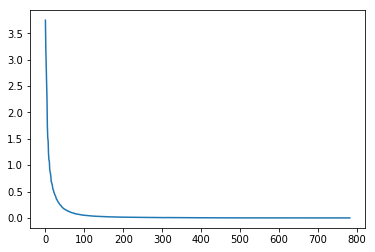

In [8]:
plt.plot(Lamb.real[1:])

# Demo

In [9]:
x1=x_valid[1,:] # pick demonstration data point (one digit)
x1.shape

(784,)

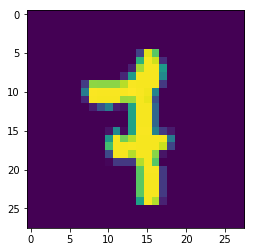

In [10]:
plt.imshow(x1.reshape(28,28))

In [11]:
z1=U.T@x1 # New coordinates of datapoint in subspace

In [12]:
z1.shape

(784,)

In [13]:
M=75 # New Dimension
Um=U[:,:M]
Um.shape

(784, 75)

In [14]:
x1_recon=Um@z1[:M].T # Reconstructed data point

In [15]:
x1_recon.shape

(784,)

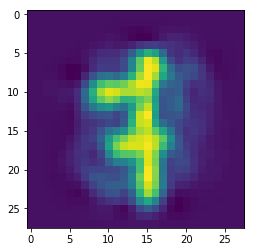

In [16]:
plt.imshow((x1_recon.real+avg).reshape(28,28))

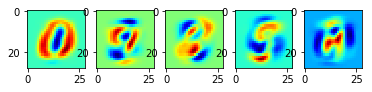

In [17]:
# Plot the largest 5 eigenvectors
for i in range(5):
    ax=plt.subplot(1,5,i+1)
    plt.imshow(U[:,i].reshape(28,28),cmap='jet')